# **PREDICTING THE LIKELIHOOD OF H1N1 AND SEASONAL FLU VACCINES UPTAKE.**

# **1. Project Overview.**

Vaccination is a critical public health measure for preventing the spread of infectious diseases, including H1N1 and seasonal influenza. However, vaccine uptake can vary significantly across different populations due to factors such as access to healthcare, socioeconomic status, education, and cultural beliefs. In Kenya, understanding the predictors of vaccine uptake is essential for improving vaccination campaigns and ensuring widespread protection against these diseases. 

# **2. Business Understanding.**
## **2.1 Business Problem.**
The year is 2024. There has been an outbreak of H1N1 and Seasonal Flu in the country. Various measures need to be put in place to curb the spread of the flu. Health providers are stressed by the situation because it is getting out of their hands, its very alarming and causing a lot of panic across all divides. As an experienced Data scienist, I have been hired by the Ministry of Health - Kenya (MoH-Kenya) to help them come up with models to help them predict how likely the citizens are to receive their H1N1 and Seasonal Flu vaccines and their perception of the same.

## **2.2 Stakeholders.**
The main stakeholders of this project or rather the beneficiaries are The Health Providers such as Ministry of Health-Kenya, Hospitals and NGOs such as Centre for Diseases Control (CDC) and World Health Organization (WHO). The models that I will come up with will interests and enable them make informed decisions when rolling out vaccinations campaigns programmes across the country and eventually across the entire globe.

## **2.3 Objectives.**
The main objective of this project is to predict whether or not respondents will receive the H1N1 and Seasonal Flu vaccines using machine learning models such as Logistic Regression and
Decision Trees Classifier.

Specific Objectives;
- Examining whether doctor's recommendation has an effect on the vaccines uptake.
- Come up with a Logistic regression and Decision tree classifier models to help predict vaccines uptake. 

### **Importing Libraries.**

## **3. Data Understanding.**

### **Data source**
A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

In [70]:
# Importing Relevant Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

import category_encoders as ce

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

%matplotlib inline

import xgboost     # extreme gradient boosting

### **Loading Data.**

In [71]:
df_test_set = pd.read_csv("test_set_features.csv")
df_test_set.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [6]:
df_training_set = pd.read_csv("training_set_features.csv")
df_training_set.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [72]:
df_training_set_labels = pd.read_csv("training_set_labels.csv")
df_training_set_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [73]:
df_training_set_labels["seasonal_vaccine"].value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

In [74]:
df_training_set_labels['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

#### **Merging datasets**

In [75]:
df = df_training_set.merge(df_training_set_labels, how='left', on='respondent_id')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


### **Exploring the dataset**

In [76]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [77]:
# Explore numerical columns
df.describe

<bound method NDFrame.describe of        respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0

In [78]:
# Checking the number of rows and columns
df.shape

(26707, 38)

##### **We can see that we have 26707 Instances and 38 Variables**

In [79]:
df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

## **H1N1 and Seasonal Flu Vaccines Columns Descriptions.**

- **respondent_id**
- **h1n1_concern** - Level of concern about the H1N1 flu.
0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- **h1n1_knowledge** - Level of knowledge about H1N1 flu.
0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- **behavioral_antiviral_meds** - Has taken antiviral medications. (binary)
- **behavioral_avoidance** - Has avoided close contact with others with flu-like symptoms. (binary)
- **behavioral_face_mask** - Has bought a face mask. (binary)
- **behavioral_wash_hands** - Has frequently washed hands or used hand sanitizer. (binary)
- **behavioral_large_gatherings** - Has reduced time at large gatherings. (binary)
- **behavioral_outside_home** - Has reduced contact with people outside of own household. (binary)
- **behavioral_touch_face** - Has avoided touching eyes, nose, or mouth. (binary)
- **doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor. (binary)
- **doctor_recc_seasonal** - Seasonal flu vaccine was recommended by doctor. (binary)
- **chronic_med_condition** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- **child_under_6_months** - Has regular close contact with a child under the age of six months. (binary)
- **health_worker** - Is a healthcare worker. (binary)
- **health_insurance** - Has health insurance. (binary)
- **opinion_h1n1_vacc_effective** - Respondent's opinion about H1N1 vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- **opinion_h1n1_risk** - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- **opinion_h1n1_sick_from_vacc** - Respondent's worry of getting sick from taking H1N1 vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- **opinion_seas_vacc_effective** - Respondent's opinion about seasonal flu vaccine effectiveness.
1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- **opinion_seas_risk** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- **opinion_seas_sick_from_vacc** - Respondent's worry of getting sick from taking seasonal flu vaccine.
1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- **age_group** - Age group of respondent.
- **education** - Self-reported education level.
- **race** - Race of respondent.
- **sex** - Sex of respondent.
- **income_poverty** - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- **marital_status** - Marital status of respondent.
- **rent_or_own** - Housing situation of respondent.
- **employment_status** - Employment status of respondent.
- **hhs_geo_region** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- **census_msa** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- **household_adults** - Number of other adults in household, top-coded to 3.
- **household_children** - Number of children in household, top-coded to 3.
- **employment_industry** - Type of industry respondent is employed in. Values are represented as short random character strings.
- **employment_occupation** - Type of occupation of respondent. Values are represented as short random character strings.
- **h1n1_vaccine**
- **seasonal_vaccine**

In [80]:
# Check for duplicates
df.duplicated().sum()

0

In [82]:
# Explore object columns
df[[c for c in df.columns if df[c].dtype =='object']].describe()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


We decided to choose the H1N1 vaccination rate as our target variable, because so many of the features are related to H1N1 vaccination. This target has a class imbalance problem which we want to deal with in this project.

### **Types of variables**

In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.

First of all, I will find categorical variables.

In [83]:
df["doctor_recc_h1n1"].dtype

dtype('float64')

In [84]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 12 categorical variables

The categorical variables are : ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']


In [86]:
# view the categorical variables

df[categorical].head()


,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb


### **Handling missing values**

In [87]:
# check missing values in categorical variables

df[categorical].isnull().sum()

age_group                    0
education                 1407
race                         0
sex                          0
income_poverty            4423
marital_status            1408
rent_or_own               2042
employment_status         1463
hhs_geo_region               0
census_msa                   0
employment_industry      13330
employment_occupation    13470
dtype: int64

In [88]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

education                 1407
income_poverty            4423
marital_status            1408
rent_or_own               2042
employment_status         1463
employment_industry      13330
employment_occupation    13470
dtype: int64


We can see that there are 8 categorical variables in the dataset which contains missing values. These are education, income_poverty, marital_status, rent_or_own, employment_status, employment_industry and employment_occupation.

### **Frequency counts of categorical variables**

Now, I will check the frequency counts of categorical variables.

In [89]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64
Female    15858
Male      10849
Name: sex, dtype: int64
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64
Married        13555
Not Married    11744
Name: marital_status, dtype: int64
Own     18736
Rent     5929
Name: rent_or_own, dtype: int64
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64
lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
at

In [90]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float64(len(df)))


65+ Years        0.256225
55 - 64 Years    0.208297
45 - 54 Years    0.196128
18 - 34 Years    0.195267
35 - 44 Years    0.144082
Name: age_group, dtype: float64
College Graduate    0.378066
Some College        0.263714
12 Years            0.217059
< 12 Years          0.088479
Name: education, dtype: float64
White                0.794623
Black                0.079305
Hispanic             0.065713
Other or Multiple    0.060359
Name: race, dtype: float64
Female    0.593777
Male      0.406223
Name: sex, dtype: float64
<= $75,000, Above Poverty    0.478414
> $75,000                    0.254989
Below Poverty                0.100985
Name: income_poverty, dtype: float64
Married        0.507545
Not Married    0.439735
Name: marital_status, dtype: float64
Own     0.701539
Rent    0.222002
Name: rent_or_own, dtype: float64
Employed              0.507732
Not in Labor Force    0.383083
Unemployed            0.054405
Name: employment_status, dtype: float64
lzgpxyit    0.160894
fpwskwrf    0.122253


### **Number of labels: Cardinality**

The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [91]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')


age_group  contains  5  labels
education  contains  5  labels
race  contains  4  labels
sex  contains  2  labels
income_poverty  contains  4  labels
marital_status  contains  3  labels
rent_or_own  contains  3  labels
employment_status  contains  4  labels
hhs_geo_region  contains  10  labels
census_msa  contains  3  labels
employment_industry  contains  22  labels
employment_occupation  contains  24  labels


No variable that need to be preprocessed as they all contain relatively smaller number of variables

In [92]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

### **Explore Categorical Variables**

Now, I will explore the categorical variables one by one.

In [93]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 12 categorical variables

The categorical variables are : ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']


In [94]:
# check for missing values in categorical variables 

df[categorical].isnull().sum()

age_group                    0
education                 1407
race                         0
sex                          0
income_poverty            4423
marital_status            1408
rent_or_own               2042
employment_status         1463
hhs_geo_region               0
census_msa                   0
employment_industry      13330
employment_occupation    13470
dtype: int64

We can see that education, income_poverty, marital_status, rent_or_own, employment_status, employment_industry and employment_occupation variables contain missing values. I will explore these variables one by one.

### **Explore age_group variable**

In [96]:
# print number of labels in Location variable

print('age_group contains', len(df["age_group"].unique()), 'labels')


age_group contains 5 labels


In [97]:
# check labels in location variable

df.age_group.unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [98]:
# check frequency distribution of values in Location variable

df["age_group"].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [99]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df["age_group"], drop_first=True).head()


,35 - 44 Years,45 - 54 Years,55 - 64 Years,65+ Years
0,0,0,1,0
1,1,0,0,0
2,0,0,0,0
3,0,0,0,1
4,0,1,0,0


### **Explore race variable**

In [100]:
# print number of labels in Location variable

print('race contains', len(df["race"].unique()), 'labels')

race contains 4 labels


In [101]:
# check labels in location variable

df.race.unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [102]:
# check frequency distribution of values in Location variable

df["race"].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [103]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df["race"], drop_first=True).head()

,Hispanic,Other or Multiple,White
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


### **Explore sex variable**

In [104]:
# print number of labels in Location variable

print('sex contains', len(df["sex"].unique()), 'labels')

sex contains 2 labels


In [105]:
# check labels in location variable

df.sex.unique()

array(['Female', 'Male'], dtype=object)

In [106]:
# check frequency distribution of values in Location variable

df["sex"].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [107]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df["sex"], drop_first=True).head()

,Male
0,0
1,1
2,1
3,0
4,0


### **Explore hhs_geo_region variable**

In [108]:
# print number of labels in Location variable

print('hhs_geo_region contains', len(df["hhs_geo_region"].unique()), 'labels')

hhs_geo_region contains 10 labels


In [109]:
# check labels in location variable

df.hhs_geo_region.unique()

array(['oxchjgsf', 'bhuqouqj', 'qufhixun', 'lrircsnp', 'atmpeygn',
       'lzgpxyit', 'fpwskwrf', 'mlyzmhmf', 'dqpwygqj', 'kbazzjca'],
      dtype=object)

In [110]:
# check frequency distribution of values in Location variable

df["hhs_geo_region"].value_counts()

lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: hhs_geo_region, dtype: int64

In [111]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df["hhs_geo_region"], drop_first=True).head()

,bhuqouqj,dqpwygqj,fpwskwrf,kbazzjca,lrircsnp,lzgpxyit,mlyzmhmf,oxchjgsf,qufhixun
0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1


### **Explore census_msa variable**

In [112]:
# print number of labels in Location variable

print('census_msa', len(df["census_msa"].unique()), 'labels')

census_msa 3 labels


In [113]:
# check labels in location variable

df.census_msa.unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [114]:
# check frequency distribution of values in Location variable

df["census_msa"].value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [115]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df["census_msa"], drop_first=True).head()

,"MSA, Principle City",Non-MSA
0,0,1
1,0,0
2,0,0
3,1,0
4,0,0


## **Explore Numerical Variables**

In [116]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)


There are 26 numerical variables

The numerical variables are : ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children', 'h1n1_vaccine', 'seasonal_vaccine']


In [117]:
# view the numerical variables

df[numerical].head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0,0


### **Explore problems within numerical variables**

Now, I will explore the numerical variables.

### **Missing values in numerical variables**

In [118]:
# check missing values in numerical variables

df[numerical].isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
h1n1_vaccine                       0
seasonal_vaccine                   0
dtype: int64

### **Outliers in numerical variables**

In [119]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count        26707.0       26615.0         26591.0                    26636.0   
mean         13353.0           2.0             1.0                        0.0   
std           7710.0           1.0             1.0                        0.0   
min              0.0           0.0             0.0                        0.0   
25%           6676.0           1.0             1.0                        0.0   
50%          13353.0           2.0             1.0                        0.0   
75%          20030.0           2.0             2.0                        0.0   
max          26706.0           3.0             2.0                        1.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count               26499.0               26688.0                26665.0   
mean                    1.0                   0.0                    1.0   
std                     0.0               

### **I will draw boxplots to visualise outliers in the above variables.**

Text(0, 0.5, 'behavioral_avoidance')

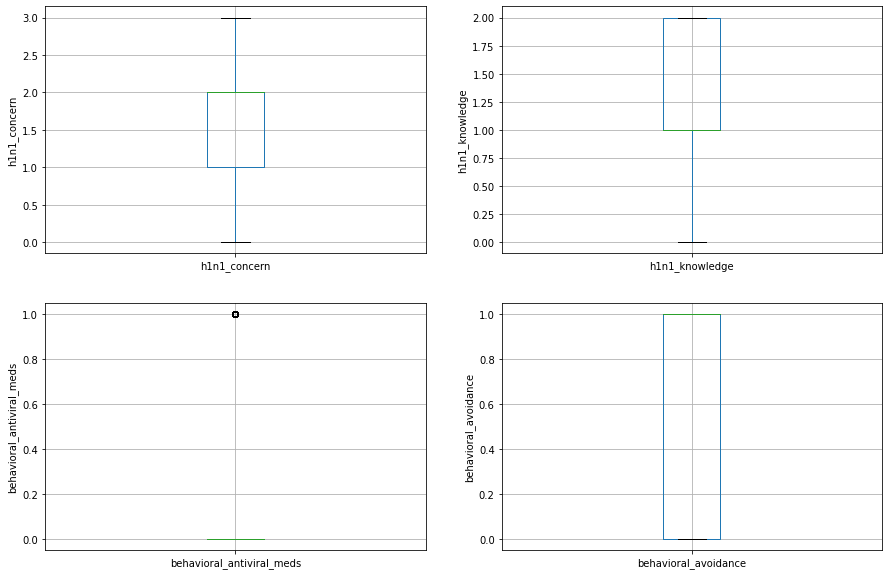

In [125]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='h1n1_concern')
fig.set_title('')
fig.set_ylabel('h1n1_concern')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='h1n1_knowledge')
fig.set_title('')
fig.set_ylabel('h1n1_knowledge')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='behavioral_antiviral_meds')
fig.set_title('')
fig.set_ylabel('behavioral_antiviral_meds')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='behavioral_avoidance')
fig.set_title('')
fig.set_ylabel('behavioral_avoidance')

Text(0, 0.5, 'behavioral_outside_home')

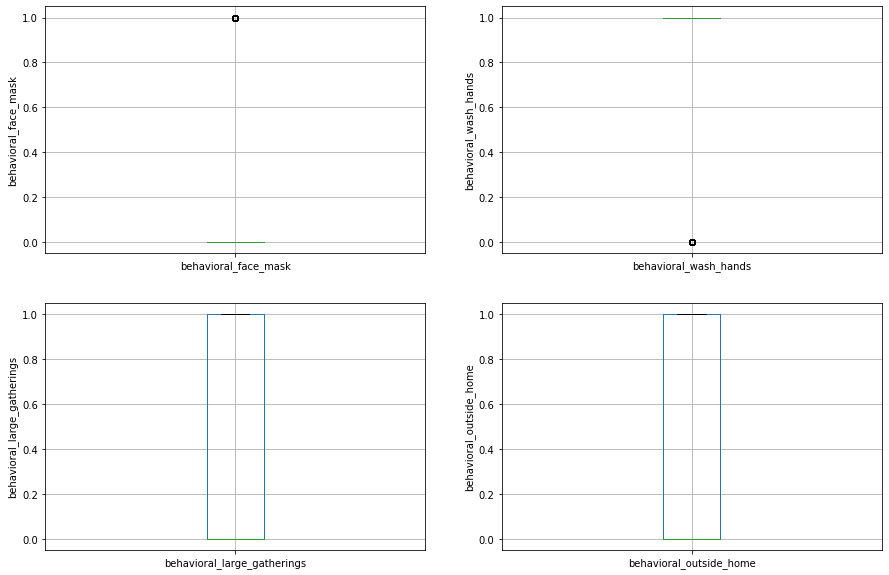

In [126]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))




plt.subplot(2, 2, 1)
fig = df.boxplot(column='behavioral_face_mask')
fig.set_title('')
fig.set_ylabel('behavioral_face_mask')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='behavioral_wash_hands')
fig.set_title('')
fig.set_ylabel('behavioral_wash_hands')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='behavioral_large_gatherings')
fig.set_title('')
fig.set_ylabel('behavioral_large_gatherings')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='behavioral_outside_home')
fig.set_title('')
fig.set_ylabel('behavioral_outside_home')

In [151]:
# find outliers for h1n1_concern variable

IQR = df["h1n1_concern"].quantile(0.75) - df.h1n1_concern.quantile(0.25)
Lower_fence = df["h1n1_concern"].quantile(0.25) - (IQR * 3)
Upper_fence = df["h1n1_concern"].quantile(0.75) + (IQR * 3)
print('h1n1_concern outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


h1n1_concern outliers are values < -2.0 or > 5.0


In [156]:
# find outliers for h1n1_knowledge variable

IQR = df["h1n1_knowledge"].quantile(0.75) - df.h1n1_knowledge.quantile(0.25)
Lower_fence = df["h1n1_knowledge"].quantile(0.25) - (IQR * 3)
Upper_fence = df["h1n1_knowledge"].quantile(0.75) + (IQR * 3)
print('h1n1_knowledge outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


h1n1_knowledge outliers are values < -2.0 or > 5.0


In [157]:
# find outliers for behavioral_antiviral_meds variable

IQR = df["behavioral_antiviral_meds"].quantile(0.75) - df.behavioral_antiviral_meds.quantile(0.25)
Lower_fence = df["behavioral_antiviral_meds"].quantile(0.25) - (IQR * 3)
Upper_fence = df["behavioral_antiviral_meds"].quantile(0.75) + (IQR * 3)
print('behavioral_antiviral_meds outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


behavioral_antiviral_meds outliers are values < 0.0 or > 0.0


In [158]:
# find outliers for behavioral_avoidance variable

IQR = df["behavioral_avoidance"].quantile(0.75) - df.behavioral_avoidance.quantile(0.25)
Lower_fence = df["behavioral_avoidance"].quantile(0.25) - (IQR * 3)
Upper_fence = df["behavioral_avoidance"].quantile(0.75) + (IQR * 3)
print('behavioral_avoidance outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

behavioral_avoidance outliers are values < -3.0 or > 4.0


## **Declare feature vector and target variable**

In [127]:
X = df.drop(['h1n1_concern'], axis=1)

y = df['h1n1_concern']

In [128]:
X = df.drop(['h1n1_knowledge'], axis=1)

y = df['h1n1_knowledge']

## **Split data into separate training and test set**

In [129]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((21365, 37), (5342, 37))

## **Feature Engineering**

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

First, I will display the categorical and numerical variables again separately.

In [130]:
# check data types in X_train

X_train.dtypes

respondent_id                    int64
h1n1_concern                   float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [131]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [132]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['respondent_id',
 'h1n1_concern',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'h1n1_vaccine',
 'seasonal_vaccine']

## **Engineering missing values in numerical variables**

In [133]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

respondent_id                     0
h1n1_concern                     77
behavioral_antiviral_meds        53
behavioral_avoidance            161
behavioral_face_mask             17
behavioral_wash_hands            28
behavioral_large_gatherings      69
behavioral_outside_home          65
behavioral_touch_face           105
doctor_recc_h1n1               1721
doctor_recc_seasonal           1721
chronic_med_condition           789
child_under_6_months            669
health_worker                   657
health_insurance               9847
opinion_h1n1_vacc_effective     313
opinion_h1n1_risk               317
opinion_h1n1_sick_from_vacc     325
opinion_seas_vacc_effective     377
opinion_seas_risk               417
opinion_seas_sick_from_vacc     429
household_adults                207
household_children              207
h1n1_vaccine                      0
seasonal_vaccine                  0
dtype: int64

In [134]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

respondent_id                     0
h1n1_concern                     15
behavioral_antiviral_meds        18
behavioral_avoidance             47
behavioral_face_mask              2
behavioral_wash_hands            14
behavioral_large_gatherings      18
behavioral_outside_home          17
behavioral_touch_face            23
doctor_recc_h1n1                439
doctor_recc_seasonal            439
chronic_med_condition           182
child_under_6_months            151
health_worker                   147
health_insurance               2427
opinion_h1n1_vacc_effective      78
opinion_h1n1_risk                71
opinion_h1n1_sick_from_vacc      70
opinion_seas_vacc_effective      85
opinion_seas_risk                97
opinion_seas_sick_from_vacc     108
household_adults                 42
household_children               42
h1n1_vaccine                      0
seasonal_vaccine                  0
dtype: int64

In [135]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

h1n1_concern 0.0036
behavioral_antiviral_meds 0.0025
behavioral_avoidance 0.0075
behavioral_face_mask 0.0008
behavioral_wash_hands 0.0013
behavioral_large_gatherings 0.0032
behavioral_outside_home 0.003
behavioral_touch_face 0.0049
doctor_recc_h1n1 0.0806
doctor_recc_seasonal 0.0806
chronic_med_condition 0.0369
child_under_6_months 0.0313
health_worker 0.0308
health_insurance 0.4609
opinion_h1n1_vacc_effective 0.0147
opinion_h1n1_risk 0.0148
opinion_h1n1_sick_from_vacc 0.0152
opinion_seas_vacc_effective 0.0176
opinion_seas_risk 0.0195
opinion_seas_sick_from_vacc 0.0201
household_adults 0.0097
household_children 0.0097


In [136]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col]=df1[col].fillna(col_median) 

In [138]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

respondent_id                  0
h1n1_concern                   0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
h1n1_vaccine                   0
seasonal_vaccine               0
dtype: int64

In [137]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

respondent_id                  0
h1n1_concern                   0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
h1n1_vaccine                   0
seasonal_vaccine               0
dtype: int64

### Now, we can see that there are no missing values in the numerical columns of training and test set.

## **Engineering missing values in categorical variables**

In [139]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

age_group                0.000000
education                0.053358
race                     0.000000
sex                      0.000000
income_poverty           0.165972
marital_status           0.053124
rent_or_own              0.077650
employment_status        0.055137
hhs_geo_region           0.000000
census_msa               0.000000
employment_industry      0.498151
employment_occupation    0.503768
dtype: float64

In [140]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

education 0.053358296278960916
income_poverty 0.1659723847413995
marital_status 0.05312426866370232
rent_or_own 0.07765036274280365
employment_status 0.05513690615492628
employment_industry 0.49815118183945706
employment_occupation 0.5037678446056635


In [141]:
X_train.mode()

,respondent_id,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo,0.0,0.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21360,26698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21361,26699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21362,26700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21363,26701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['education'].fillna(X_train['education'].mode()[0], inplace=True)
    df2['income_poverty'].fillna(X_train['income_poverty'].mode()[0], inplace=True)
    df2['marital_status'].fillna(X_train['marital_status'].mode()[0], inplace=True)
    df2['rent_or_own'].fillna(X_train['rent_or_own'].mode()[0], inplace=True)
    df2['employment_status'].fillna(X_train['employment_status'].mode()[0], inplace=True)
    df2['employment_industry'].fillna(X_train['employment_industry'].mode()[0], inplace=True)
    df2['employment_occupation'].fillna(X_train['employment_occupation'].mode()[0], inplace=True)


In [145]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
employment_status        0
hhs_geo_region           0
census_msa               0
employment_industry      0
employment_occupation    0
dtype: int64

In [146]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
employment_status        0
hhs_geo_region           0
census_msa               0
employment_industry      0
employment_occupation    0
dtype: int64

In [147]:
# check missing values in X_train

X_train.isnull().sum()

respondent_id                  0
h1n1_concern                   0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [148]:
# check missing values in X_test

X_test.isnull().sum()

respondent_id                  0
h1n1_concern                   0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

### We can see that there are no missing values in X_train and X_test.

### **Engineering outliers in numerical variables**

We have seen that the Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm columns contain outliers

In [149]:
X_train.isnull().sum()

respondent_id                  0
h1n1_concern                   0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [164]:
upper_thresholds = {
    'h1n1_concern': 5.0,
    'behavioral_antiviral_meds': 0.0,
    'behavioral_avoidance': 4.0
}

for df3 in [X_train, X_test]:
    for column, top in upper_thresholds.items():
        df3[column] = df3[column].clip(upper=top)

In [166]:
X_train.h1n1_concern.max(), X_test.h1n1_concern.max()

(3.0, 3.0)

In [168]:
X_train.behavioral_antiviral_meds.max(), X_test.behavioral_antiviral_meds.max()

(0.0, 0.0)

In [169]:
X_train.behavioral_avoidance.max(), X_test.behavioral_avoidance.max()

(1.0, 1.0)

In [174]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['h1n1_concern'].fillna(X_train['h1n1_concern'].mode()[0], inplace=True)
    df2['behavioral_antiviral_meds'].fillna(X_train['behavioral_antiviral_meds'].mode()[0], inplace=True)
    df2['behavioral_avoidance'].fillna(X_train['behavioral_avoidance'].mode()[0], inplace=True)

In [175]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
employment_status        0
hhs_geo_region           0
census_msa               0
employment_industry      0
employment_occupation    0
dtype: int64

In [176]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
employment_status        0
hhs_geo_region           0
census_msa               0
employment_industry      0
employment_occupation    0
dtype: int64

#### As a final check, I will check for missing values in X_train and X_test.

In [177]:
# check missing values in X_train

X_train.isnull().sum()

respondent_id                  0
h1n1_concern                   0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [178]:
# check missing values in X_test

X_test.isnull().sum()

respondent_id                  0
h1n1_concern                   0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

### **Encode categorical variables**

In [180]:
categorical

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [181]:
X_train[categorical].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
18127,35 - 44 Years,12 Years,White,Female,Below Poverty,Married,Own,Employed,lzgpxyit,Non-MSA,pxcmvdjn,xgwztkwe
21609,45 - 54 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",fcxhlnwr,bxpfxfdn
15009,65+ Years,< 12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
13516,35 - 44 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,mlyzmhmf,"MSA, Principle City",ldnlellj,xzmlyyjv
15551,65+ Years,< 12 Years,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,atmlpfrs,vlluhbov


In [191]:
# encode education variable

import category_encoders as ce

binary_encoder = ce.BinaryEncoder(cols=['education'])

X_train = binary_encoder.fit_transform(X_train)

X_test = binary_encoder.transform(X_test)

In [192]:
X_train.head()

,respondent_id,h1n1_concern_0,h1n1_concern_1,h1n1_concern_2,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
18127,18127,0,0,1,0.0,1.0,0.0,1.0,1.0,0.0,...,Own,Employed,lzgpxyit,Non-MSA,1.0,2.0,pxcmvdjn,xgwztkwe,0,0
21609,21609,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,...,Own,Employed,bhuqouqj,"MSA, Not Principle City",0.0,2.0,fcxhlnwr,bxpfxfdn,0,0
15009,15009,0,0,1,0.0,1.0,0.0,1.0,0.0,1.0,...,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo,0,1
13516,13516,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,mlyzmhmf,"MSA, Principle City",2.0,2.0,ldnlellj,xzmlyyjv,0,1
15551,15551,0,1,1,0.0,1.0,0.0,1.0,0.0,1.0,...,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,atmlpfrs,vlluhbov,0,1


In [193]:
X_train.isnull().sum()

respondent_id                  0
h1n1_concern_0                 0
h1n1_concern_1                 0
h1n1_concern_2                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education_0                    0
education_1                    0
education_2                    0
race                           0
sex                            0
income_poverty                 0
marital_st

We can see that two additional variables h1n1_concern_0 and h1n1_concern_1 are created from h1n1_concern_ variable.

Now, I will create the X_train training set.

In [197]:
# using ohe Recommended 

ohe = ce.OneHotEncoder(cols=["behavioral_antiviral_meds","chronic_med_condition","education_0","behavioral_avoidance"],handle_missing="value",handle_unknown="ignore")

ohe.fit(X_train)

X_train = ohe.transform(X_train)
X_test = ohe.transform(X_test)

X_train.head()

,respondent_id,h1n1_concern_0,h1n1_concern_1,h1n1_concern_2,behavioral_antiviral_meds_1,behavioral_avoidance_1,behavioral_avoidance_2,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
18127,18127,0,0,1,1,1,0,0.0,1.0,1.0,...,Own,Employed,lzgpxyit,Non-MSA,1.0,2.0,pxcmvdjn,xgwztkwe,0,0
21609,21609,0,1,0,1,1,0,0.0,0.0,0.0,...,Own,Employed,bhuqouqj,"MSA, Not Principle City",0.0,2.0,fcxhlnwr,bxpfxfdn,0,0
15009,15009,0,0,1,1,1,0,0.0,1.0,0.0,...,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo,0,1
13516,13516,0,1,0,1,0,1,0.0,0.0,0.0,...,Own,Employed,mlyzmhmf,"MSA, Principle City",2.0,2.0,ldnlellj,xzmlyyjv,0,1
15551,15551,0,1,1,1,1,0,0.0,1.0,0.0,...,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,atmlpfrs,vlluhbov,0,1


In [206]:
X_train.head()

,respondent_id,h1n1_concern_0,h1n1_concern_1,h1n1_concern_2,behavioral_antiviral_meds_1,behavioral_avoidance_1,behavioral_avoidance_2,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
18127,18127,0,0,1,1,1,0,0.0,1.0,1.0,...,Own,Employed,lzgpxyit,Non-MSA,1.0,2.0,pxcmvdjn,xgwztkwe,0,0
21609,21609,0,1,0,1,1,0,0.0,0.0,0.0,...,Own,Employed,bhuqouqj,"MSA, Not Principle City",0.0,2.0,fcxhlnwr,bxpfxfdn,0,0
15009,15009,0,0,1,1,1,0,0.0,1.0,0.0,...,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo,0,1
13516,13516,0,1,0,1,0,1,0.0,0.0,0.0,...,Own,Employed,mlyzmhmf,"MSA, Principle City",2.0,2.0,ldnlellj,xzmlyyjv,0,1
15551,15551,0,1,1,1,1,0,0.0,1.0,0.0,...,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,atmlpfrs,vlluhbov,0,1


In [207]:
X_test.head()

,respondent_id,h1n1_concern_0,h1n1_concern_1,h1n1_concern_2,behavioral_antiviral_meds_1,behavioral_avoidance_1,behavioral_avoidance_2,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
17088,17088,0,0,1,1,0,1,0.0,1.0,1.0,...,Rent,Not in Labor Force,qufhixun,"MSA, Principle City",0.0,0.0,fcxhlnwr,xtkaffoo,0,1
1971,1971,0,0,1,1,1,0,0.0,1.0,0.0,...,Rent,Not in Labor Force,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo,0,1
16698,16698,0,1,0,1,0,1,0.0,1.0,0.0,...,Own,Employed,lzgpxyit,"MSA, Principle City",2.0,0.0,fcxhlnwr,cmhcxjea,1,1
22074,22074,0,0,1,1,0,1,0.0,1.0,1.0,...,Own,Employed,kbazzjca,"MSA, Not Principle City",0.0,0.0,fcxhlnwr,cmhcxjea,0,0
21458,21458,0,0,1,1,1,0,0.0,1.0,0.0,...,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,fcxhlnwr,xtkaffoo,0,0


## **Feature scaling**

In [208]:
X_train.describe()

,respondent_id,h1n1_concern_0,h1n1_concern_1,h1n1_concern_2,behavioral_antiviral_meds_1,behavioral_avoidance_1,behavioral_avoidance_2,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,opinion_seas_risk,opinion_seas_sick_from_vacc,education_0_1,education_0_2,education_1,education_2,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,21365.000000,21365.000000,21365.000000,21365.000000,21365.0,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,...,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000
mean,13322.347297,0.123660,0.475404,0.573368,1.0,0.728341,0.271659,0.070302,0.826820,0.358764,...,2.707325,2.118746,0.734098,0.265902,0.517903,0.305640,0.886216,0.529511,0.210812,0.465668
std,7717.594170,0.329201,0.499406,0.494599,0.0,0.444826,0.444826,0.255661,0.378412,0.479649,...,1.376694,1.322464,0.441823,0.441823,0.499691,0.460689,0.747723,0.924470,0.407895,0.498832
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6624.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13272.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,...,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,20019.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000,...,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,26705.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000


In [209]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

ValueError: could not convert string to float: '35 - 44 Years'

In [210]:
X_train = pd.DataFrame(
    scaler.transform(X_train),
    columns=X_train.columns
    )

ValueError: could not convert string to float: '35 - 44 Years'

In [ ]:
X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns=[cols]
    )

In [ ]:
X_train.describe()

In [19]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical columns
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first 10 rows of the transformed data
data_encoded.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


# 4. **Exploratory Data Analysis (EDA).**

### **Pair plot**

This enables the visualization of the relationship between each pair of variables in our dataset.

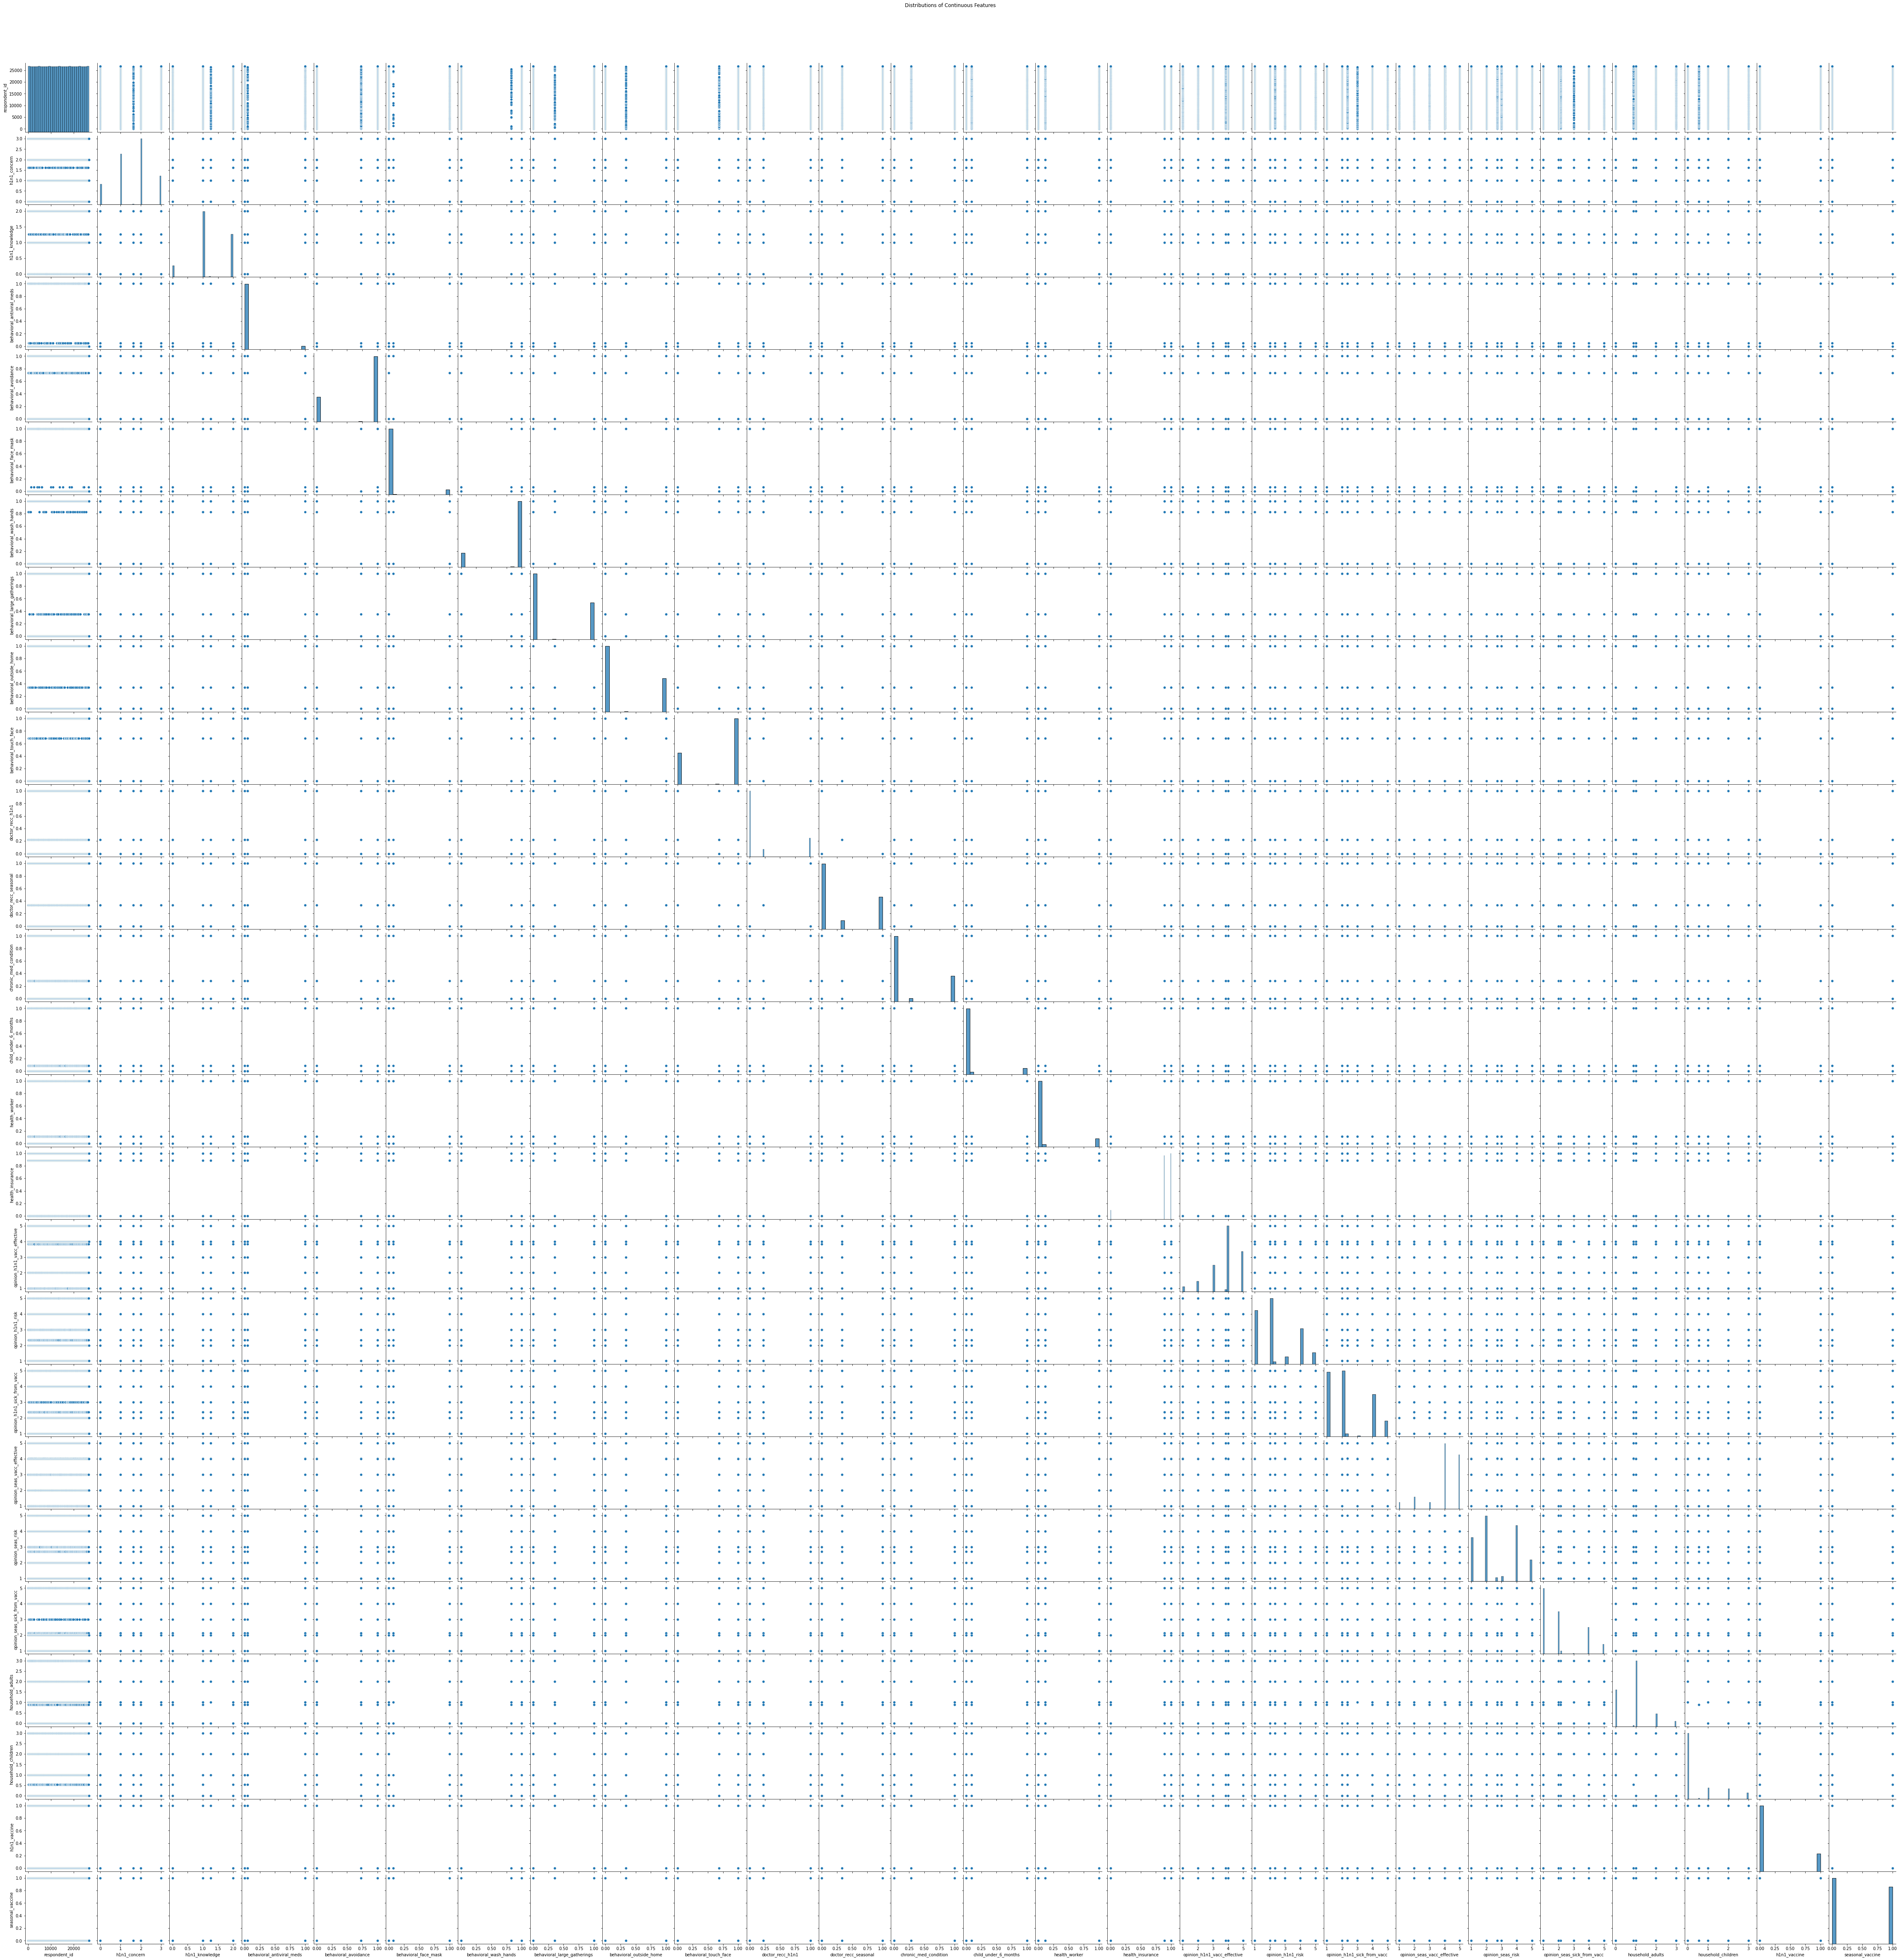

In [20]:
sns.pairplot(df)
plt.suptitle('Distributions of Continuous Features', y=1.02)  
plt.show()

### **Correlation Heatmap**

In [27]:
df.corr()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,1.000000,0.017805,0.003417,-0.008463,0.009592,-0.006641,0.011098,0.004530,0.008995,0.007556,...,0.005872,0.000945,-0.002253,0.005884,-0.005245,0.009478,0.000185,-0.003711,-0.003280,-0.004652
h1n1_concern,0.017805,1.000000,0.062057,0.089987,0.231937,0.155470,0.292473,0.254144,0.245599,0.246784,...,0.236857,0.372901,0.355984,0.231972,0.329231,0.222356,-0.015541,0.050180,0.121745,0.154561
h1n1_knowledge,0.003417,0.062057,1.000000,-0.010807,0.088124,0.029954,0.089367,-0.048678,-0.067896,0.085611,...,0.119368,0.072191,-0.019235,0.084638,0.075575,-0.061524,0.024597,0.050133,0.117713,0.119890
behavioral_antiviral_meds,-0.008463,0.089987,-0.010807,1.000000,0.049066,0.145898,0.063981,0.106099,0.127342,0.070734,...,0.029798,0.103517,0.077864,0.014763,0.083717,0.082686,0.044466,0.084068,0.040522,0.006272
behavioral_avoidance,0.009592,0.231937,0.088124,0.049066,1.000000,0.064757,0.336240,0.226529,0.219329,0.332838,...,0.110860,0.116492,0.129784,0.117859,0.127539,0.081533,0.018915,0.039993,0.047529,0.076098
behavioral_face_mask,-0.006641,0.155470,0.029954,0.145898,0.064757,1.000000,0.083282,0.180570,0.163090,0.104160,...,0.037153,0.129331,0.105665,0.040911,0.108281,0.088469,0.013893,0.005796,0.070464,0.050065
behavioral_wash_hands,0.011098,0.292473,0.089367,0.063981,0.336240,0.083282,1.000000,0.194899,0.192227,0.363792,...,0.135557,0.167208,0.148781,0.137042,0.170539,0.086989,0.009615,0.047493,0.074663,0.112327
behavioral_large_gatherings,0.004530,0.254144,-0.048678,0.106099,0.226529,0.180570,0.194899,1.000000,0.582317,0.252797,...,0.051842,0.125306,0.184183,0.077682,0.131358,0.133813,-0.031716,-0.009378,0.017804,0.063917
behavioral_outside_home,0.008995,0.245599,-0.067896,0.127342,0.219329,0.163090,0.192227,0.582317,1.000000,0.266856,...,0.050269,0.124332,0.173095,0.066706,0.118813,0.136431,-0.027354,-0.009502,0.021742,0.053426
behavioral_touch_face,0.007556,0.246784,0.085611,0.070734,0.332838,0.104160,0.363792,0.252797,0.266856,1.000000,...,0.103073,0.144664,0.130454,0.104604,0.141977,0.088922,-0.000571,0.023419,0.071507,0.119940


### **Visualizing any correlation between features**

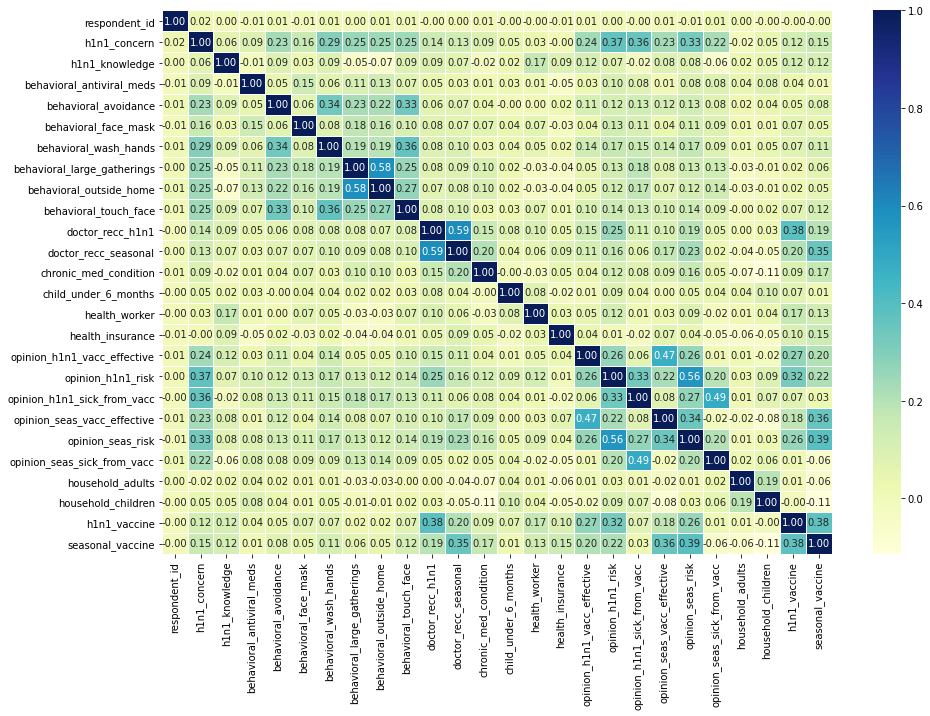

In [28]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

The heatmap was evaluated for a potenetial presence of correlation between differnt features. It is noted that, no significant association is observed for almost all features except for the very few ones.There is a correlation between doctors recomneding H1N1 flu vaccine and seasonal flu.

In [29]:
# Exploring target distribution
df['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

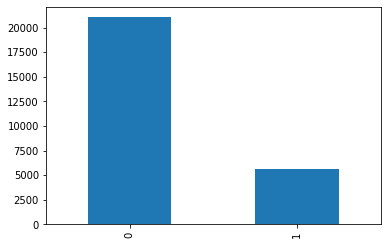

In [30]:
df['h1n1_vaccine'].value_counts().plot(kind='bar');

In [31]:
# Exploring target distribution
df['seasonal_vaccine'].value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

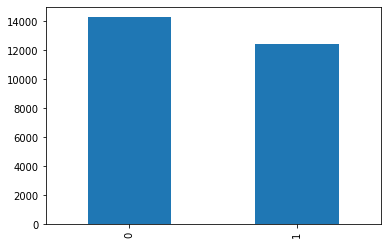

In [32]:
df['seasonal_vaccine'].value_counts().plot(kind='bar');

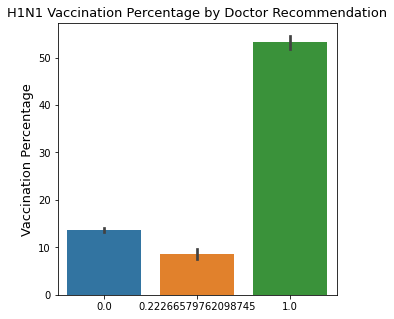

In [33]:
# Setting the size of the plot
plt.figure(figsize = (5,5))
# # Graph for relationship between H1N1 vaccination and Doctor recommendation
dr = sns.barplot(x=df['doctor_recc_h1n1'].dropna(), y=df['h1n1_vaccine']*100)
dr.set_xlabel('')
dr.set_ylabel('Vaccination Percentage', fontsize=13)
dr.set_title('H1N1 Vaccination Percentage by Doctor Recommendation', fontsize=13);

<Axes: xlabel='chronic_med_condition', ylabel='h1n1_vaccine'>

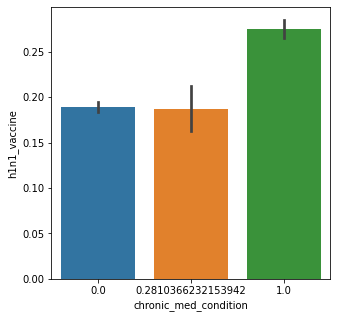

In [34]:
# Setting the size of the plot
plt.figure(figsize = (5,5))
# Quick graph relatin chronic health condition with vaccination percentage
sns.barplot(x=df['chronic_med_condition'].dropna(), y=df['h1n1_vaccine'])

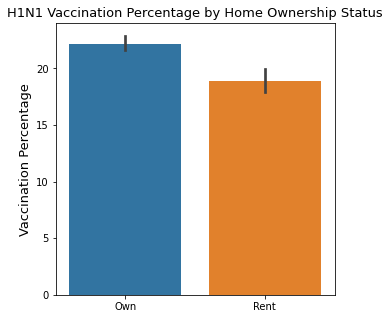

In [35]:
# Setting the size of the plot
plt.figure(figsize = (5,5))
# graph for home ownership status
home = sns.barplot(x=df['rent_or_own'], y=df['h1n1_vaccine']*100)
home.set_xlabel('')
home.set_ylabel('Vaccination Percentage', fontsize=13)
home.set_title('H1N1 Vaccination Percentage by Home Ownership Status', fontsize=13);

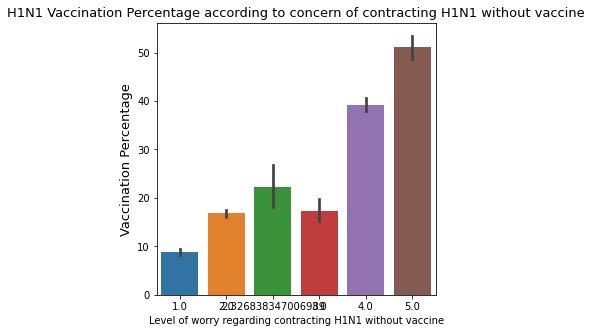

In [36]:
# Setting the size of the plot
plt.figure(figsize = (5,5))
# Graph showing relationship between level of concern in contracting H1N1 and vaccination percentage
risk = sns.barplot(x=df['opinion_h1n1_risk'].dropna(), y=df['h1n1_vaccine']*100)
risk.set_xlabel('Level of worry regarding contracting H1N1 without vaccine')
risk.set_ylabel('Vaccination Percentage', fontsize=13)
risk.set_title('H1N1 Vaccination Percentage according to concern of contracting H1N1 without vaccine', fontsize=13);

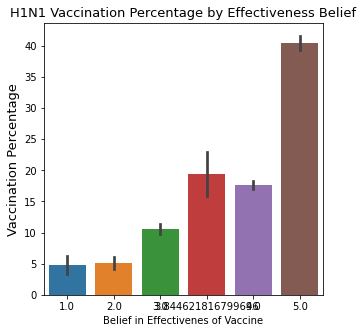

In [37]:
# Setting the size of the plot
plt.figure(figsize = (5,5))
# Graph for vaccine percentage differrentiation depending on opinion of effectiveness of H1N1 Vaccine
ins = sns.barplot(x=df['opinion_h1n1_vacc_effective'].dropna(), y=df['h1n1_vaccine']*100)
ins.set_xlabel('Belief in Effectivenes of Vaccine')
ins.set_ylabel('Vaccination Percentage', fontsize=13)
ins.set_title('H1N1 Vaccination Percentage by Effectiveness Belief', fontsize=13);

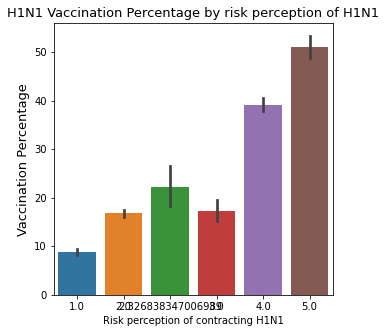

In [38]:
# Setting the size of the plot
plt.figure(figsize = (5, 5))
# Risk graph exploring vaccine percentage depending on risk perception of H1N1
ins = sns.barplot(x=df['opinion_h1n1_risk'].dropna(), y=df['h1n1_vaccine']*100)
ins.set_xlabel('Risk perception of contracting H1N1')
ins.set_ylabel('Vaccination Percentage', fontsize=13)
ins.set_title('H1N1 Vaccination Percentage by risk perception of H1N1', fontsize=13);

## **5. Data Preparation.**

Describe and justify the process for preparing the data for analysis.

Questions to consider:

Were there variables you dropped or created? How did you address missing values or outliers? Why are these choices appropriate given the data and the business problem? Can you pipeline your preparation steps to use them consistently in the modeling process?

In [48]:
# Define our X and y
X = df.drop(columns = ['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y = df['h1n1_vaccine']


# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Regular Train Test Split
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.000000,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.222666,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.000000,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [49]:
# Set up lists for each columns datatypes
num_cols = []
ohe_cols = []
freq_cols = []

for c in X.columns:
    if X[c].dtype in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [50]:
# I want to see each column category
print(f'Numerical Columns:', num_cols)
print('\n')
print(f'Object Columns (with less than 10 unique values):', ohe_cols)
print('\n')
print(f'Object Columns (with more than 10 unique values):', freq_cols)

Numerical Columns: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


Object Columns (with less than 10 unique values): ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']


Object Columns (with more than 10 unique values): ['hhs_geo_region', 'employment_industry', 'employment_occupation']


### **Data Preprocessing**

In [51]:
# Preprocessing with Pipelines
num_transformer = Pipeline(steps=[
    ('num_imputer', IterativeImputer(max_iter=100, random_state=42)),   # replace missing values by IterativeImputer
    ('minmaxscaler', MinMaxScaler())                                    # Scale the numbers by MinMaxScaler
])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  # replace missing categories by SimpleImputer
    ('ohe_encoder', OneHotEncoder(handle_unknown='ignore'))                     # Transform each category into a new column
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder', ce.count.CountEncoder(normalize=True, min_group_size=.05)), # replace category names with frequency counts by CountEncoder
    ('freq_imputer', IterativeImputer(max_iter=100, random_state=42))            # replace missing values by IterativeImputer
])

In [52]:
# Preprocessor defined using ColumnTransformer by packaging the all components together
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
    ])

In [53]:
# Regular Train Test Split
X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [54]:
# Fitting preprocessor to see the components as a whole
preprocessor.fit(X_tr)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral...
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['hhs_geo_region', 'employment_industry',
                                  'employment_occupation'])])

In [55]:
# Let'see what this looks like after the preprocessor transformation
X_tr_transformed = preprocessor.transform(X_tr)
X_tr_transformed.shape

(19228, 59)

In [56]:
# Visualize it with Pandas dataframe 
pd.DataFrame(X_tr_transformed).head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,1.000000,0.5,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.106407,0.499168,0.504213
1,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.160235,0.340961,0.371854
2,0.333333,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.076659,0.499168,0.504213
3,0.333333,0.5,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.499168,0.504213
4,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.160235,0.340961,0.371854


In each model, we will put this preprocessor into the modelling pipeline to make sure null values are filled and categorical variables are transformed.

## **6. Modelling.**



### **6.1 MODEL 1: Dummy model classifier**

In [249]:
dummy_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DummyClassifier(strategy="most_frequent"))
])

In [250]:
dummy_model.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier', DummyClassifier(strategy='most_frequent'))])

In [251]:
# Evaluate dummy model
evaluate(dummy_model, X_tr, X_te, y_tr, y_te, roc_auc='skip')

Training Scores:
Train Accuracy: 0.7875494071146245
Train Precision: 0.0
Train Recall: 0.0
Train F1-Score: 0.0
**********
Testing Scores:
Test Accuracy: 0.7874376039933444
Test Precision: 0.0
Test Recall: 0.0
Test F1-Score: 0.0


c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **6.2 MODEL 2: Logistic Regression Model**

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
model =  LinearRegression()

In [69]:
model.fit(x_tr,y_train)

NameError: name 'x_tr' is not defined

In [57]:
logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

In [58]:
cross_validate(logreg, X_tr, y_tr, return_train_score=True)

{'fit_time': array([1.0981648 , 0.88446355, 1.00525928, 1.0601604 , 0.93246365]),
 'score_time': array([0.03348899, 0.01654363, 0.03066659, 0.03127241, 0.03328419]),
 'test_score': array([0.83463339, 0.83931357, 0.82787311, 0.84421326, 0.82886866]),
 'train_score': array([0.83682226, 0.83552204, 0.83688727, 0.83273744, 0.83676786])}

In [59]:
# Let's do GridSearchCV
param_grid = {
    "classifier__solver": ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
    "classifier__C" : [1, 0.1, 0.01], # regularization parameter
    "classifier__class_weight": ['balanced', None]
}

In [61]:
grid = GridSearchCV(logreg, param_grid, scoring=['f1','precision'], refit = 'f1')

In [62]:
output_logreg = grid.fit(X_tr, y_tr)

In [267]:
output_logreg.best_params_

{'classifier__C': 1,
 'classifier__class_weight': 'balanced',
 'classifier__solver': 'lbfgs'}

In [268]:
output_logreg.best_estimator_.fit(X_tr, y_tr)

te_preds_logreg = output_logreg.best_estimator_.predict(X_te)

In [269]:
evaluate(output_logreg.best_estimator_, X_tr, X_te, y_tr, y_te)

Training Scores:
Train Accuracy: 0.7771999167880175
Train Precision: 0.4839800354210272
Train Recall: 0.7358629130966953
Train F1-Score: 0.583916083916084
**********
Testing Scores:
Test Accuracy: 0.7830698835274542
Test Precision: 0.49320388349514566
Test Recall: 0.7455968688845401
Test F1-Score: 0.5936891312816518


### **6.3 MODEL 3: Decision Tree Classifier**

In [273]:
# Setting up the DecisionTreeClassifier to go though the pipeline
dtc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced', max_depth = 5))
])

# The parameters are chosen based on GridSearchCV done in Project3_model_iterations.ipynb notebook results!

In [274]:
# fitting the model to the training data
dtc.fit(X_tr, y_tr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=5))])

In [275]:
# Evaluating the decision tree model for various metrics
evaluate(dtc, X_tr, X_te, y_tr, y_te, roc_auc='skip')

Training Scores:
Train Accuracy: 0.7951945080091534
Train Precision: 0.5125148986889154
Train Recall: 0.7368421052631579
Train F1-Score: 0.6045390640690902
**********
Testing Scores:
Test Accuracy: 0.7957570715474209
Test Precision: 0.5134952766531714
Test Recall: 0.7446183953033269
Test F1-Score: 0.6078274760383386


In [178]:
def evaluate(estimator, X_tr, X_te, y_tr, y_te, roc_auc='skip'):
    '''
    Evaluation function to show a few scores for both the train and test set
    Also shows a confusion matrix for the test set
    
    roc_auc allows you to set how to calculate the roc_auc score: 
    'dec' for decision_function or 'proba' for predict_proba 
    If roc_auc == 'skip', then it ignores calculating the roc_auc_score
    
    Inputs:
        estimator: a fit sklearn-style model or pipeline
        X_tr: array or pandas dataframe
            training input variables
        X_te: array or pandas dataframe
            testing input variables
        y_tr: array or pandas series
            training output variable
        y_te: array or pandas series
            testing output variable
        roc_auc: str
            'skip': default, skips calculating roc_auc
            'dec': use decision_function to calculate roc_auc
            'proba': use predict_proba to calculate roc_auc
            
    Code source link: 
    https://github.com/lindseyberlin/Cat-in-the-Dat-Project/blob/main/notebooks/Lindsey/EDA-Initial-Models.ipynb
    '''
    # Grab predictions
    tr_preds = estimator.predict(X_tr)
    te_preds = estimator.predict(X_te)
    
    # output needed for roc_auc_score
    if roc_auc == 'skip': # skips calculating the roc_auc_score
        train_out = False
        test_out = False
    elif roc_auc == 'dec': 
        train_out = estimator.decision_function(X_tr)
        test_out = estimator.decision_function(X_te)
    elif roc_auc == 'proba': 
        train_out = estimator.predict_proba(X_tr)[:, 1] # proba for the 1 class
        test_out = estimator.predict_proba(X_te)[:, 1]
    else:
        raise Exception("The value for roc_auc should be 'skip', 'dec' or 'proba'")    
    
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train Precision: {precision_score(y_tr, tr_preds)}")
    print(f"Train Recall: {recall_score(y_tr, tr_preds)}")
    print(f"Train F1-Score: {f1_score(y_tr, tr_preds)}")
    if type(train_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_train, train_out)}")
        
    print("*" * 10)
    print("Testing Scores:")
    print(f"Test Accuracy: {accuracy_score(y_te, te_preds)}")
    print(f"Test Precision: {precision_score(y_te, te_preds)}")
    print(f"Test Recall: {recall_score(y_te, te_preds)}")
    print(f"Test F1-Score: {f1_score(y_te, te_preds)}")
    if type(test_out) == np.ndarray: # checking for roc_auc
        print(f"ROC-AUC: {roc_auc_score(y_test, test_out)}")    
    

## **Comparison of Model ROC Curves**

NameError: name 'plot_roc_curve' is not defined

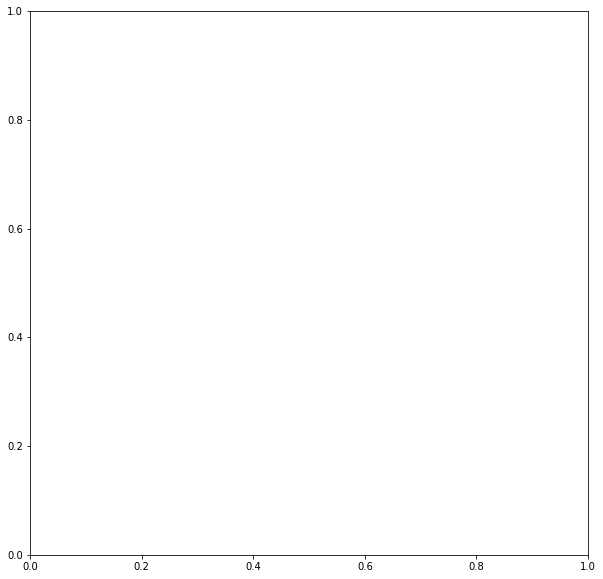

In [280]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_roc_curve(dummy_model, X_te, y_te,
               name='Dummy model', ax=ax)
plot_roc_curve(logreg, X_te, y_te, 
               name='Logistic regression', ax=ax)
plot_roc_curve(dtc, X_te, y_te,
               name='Decision tree classification', ax=ax)